# UMAPs Neurips samples, NK cells

In this notebook different markers to identify NK cell subpopulations are tested. Markers are collected from paper by Yang et al., (2019). RNA and corresponding surface markers are shown when available. Protein expression levels within a cell are normalized using the dsb transformation. UMAPs are generated using latent space representation of measured RNA and surface protein data. 


Reference: Yang, C., Siebert, J. R., Burns, R., Gerbec, Z. J., Bonacci, B., Rymaszewski, A., Rau, M., Riese, M. J., Rao, S., Carlson, K. S., Routes, J. M., Verbsky, J. W., Thakar, M. S., & Malarkannan, S. (2019). Heterogeneity of human bone marrow and blood natural killer cells defined by single-cell transcriptome. Nature communications, 10(1), 3931. https://doi.org/10.1038/s41467-019-11947-7


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Add here new "outer-file" with more genes

#Easigenomics dataset

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')

adata.obs['batch_group']

AAACCTGAGCCCTAAT-1-100    Easi
AAACCTGCAAGCCGCT-1-100    Easi
AAACCTGCACTGTCGG-1-100    Easi
AAACCTGCAGACGCTC-1-100    Easi
AAACCTGTCCTTAATC-1-100    Easi
                          ... 
TTTGTCAGTACATCCA-1-158    Easi
TTTGTCAGTAGGCATG-1-158    Easi
TTTGTCAGTATGCTTG-1-158    Easi
TTTGTCATCAAACCAC-1-158    Easi
TTTGTCATCCATGAAC-1-158    Easi
Name: batch_group, Length: 121340, dtype: category
Categories (1, object): ['Easi']

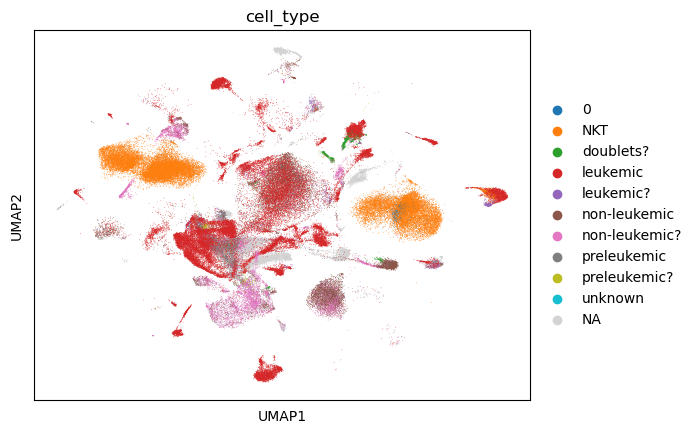

In [3]:
#latent space?

sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')

In [4]:
adata.obs['cell_type'].unique().tolist()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [5]:
#surface protein expression 
prot=adata.obsm['protein_expression_dsb']

In [6]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD38': 'CD38_prot', 'CD34': 'CD34_prot'})

In [7]:
#adding protein information to obs

a = adata.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata.obs=adata1

adata

AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [8]:
#Computing a neighborhood of observations using latent space, before subsetting the data

sc.pp.neighbors(adata, use_rep="X_totalVI")  

sc.tl.umap(adata)

In [9]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

In [10]:
#Both NKT cells selected

adata_nkt = adata[(adata.obs['cell_type'] == "NKT")]

adata_nkt

View of AnnData object with n_obs × n_vars = 27738 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [11]:
#selecting one sample, all cell types 

eg=adata[adata.obs['POOL'] == "EG35"]

eg

View of AnnData object with n_obs × n_vars = 2188 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [12]:
#selecting one sample, only NKT cells

sample_nk=adata_nkt[adata_nkt.obs['POOL'] == "EG35"]

sample_nk

View of AnnData object with n_obs × n_vars = 1226 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

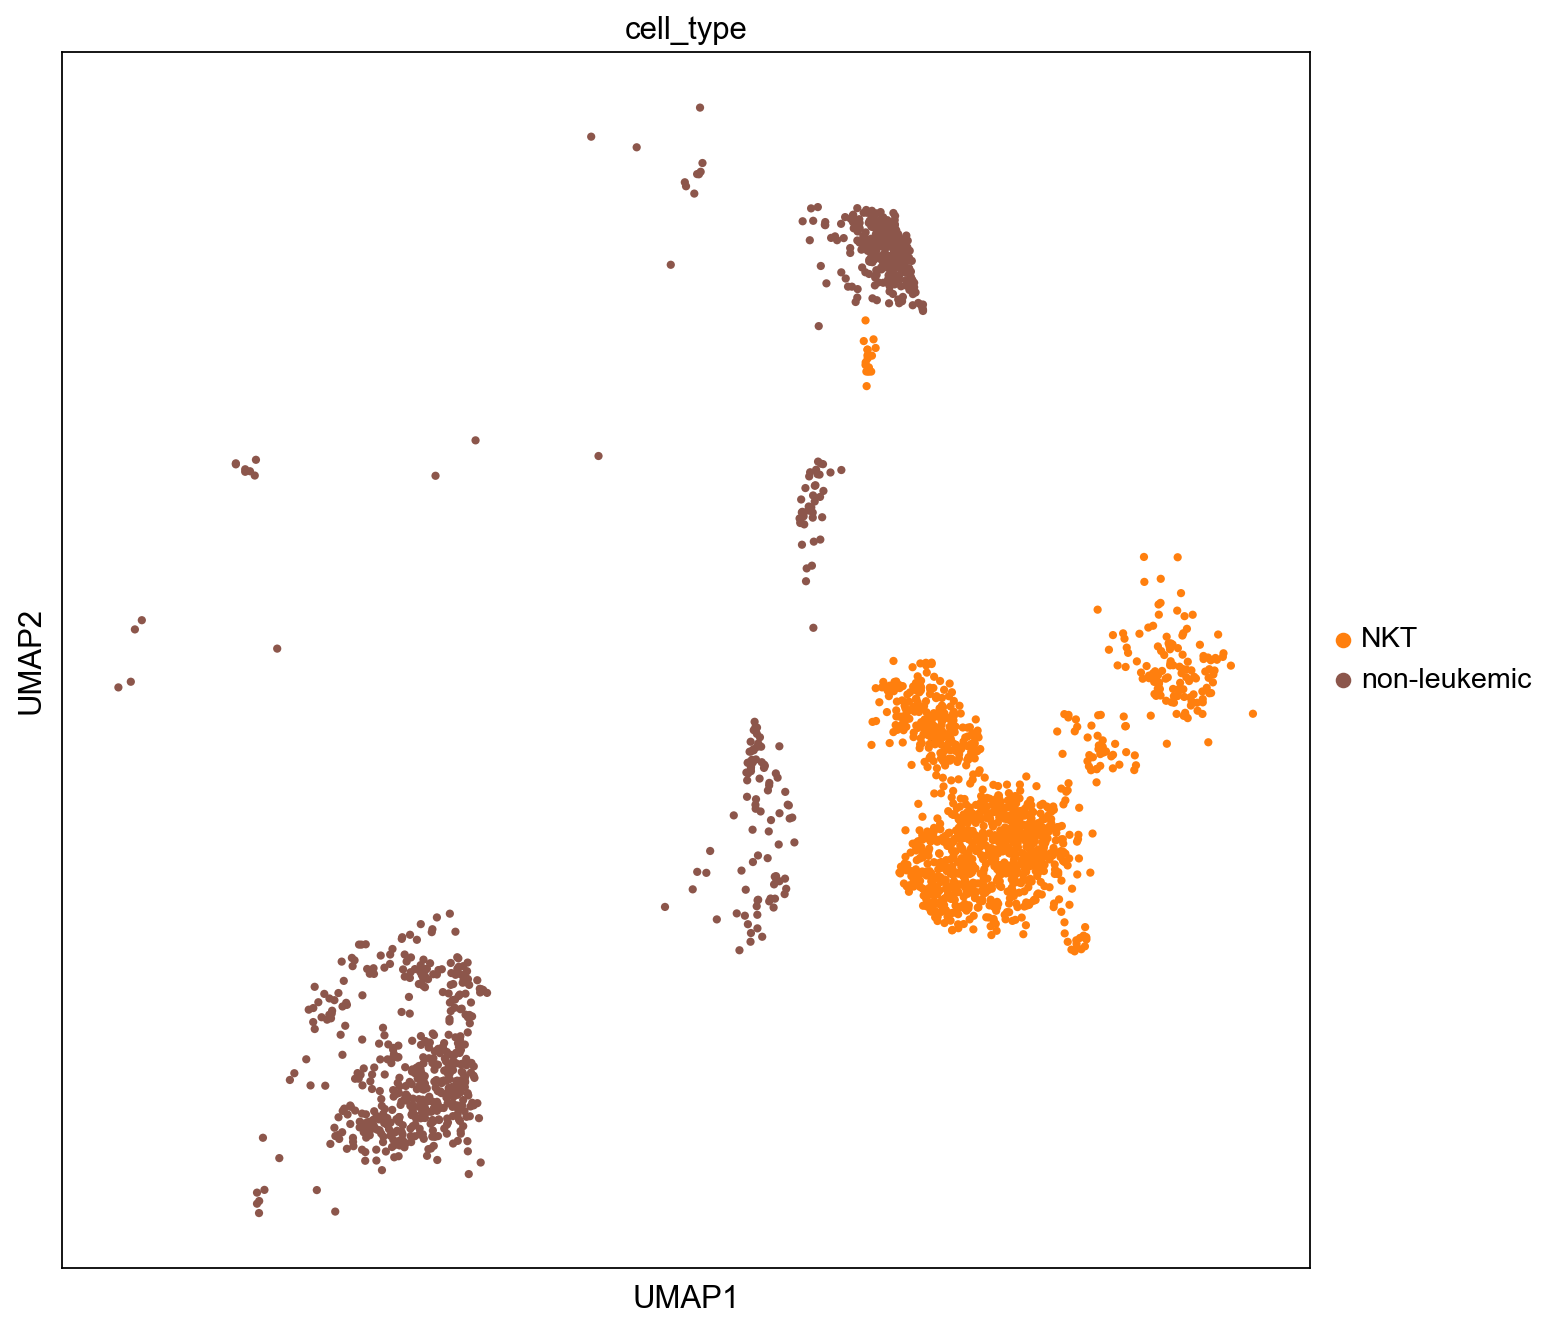

In [13]:
#Only selected sample, all cell types

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

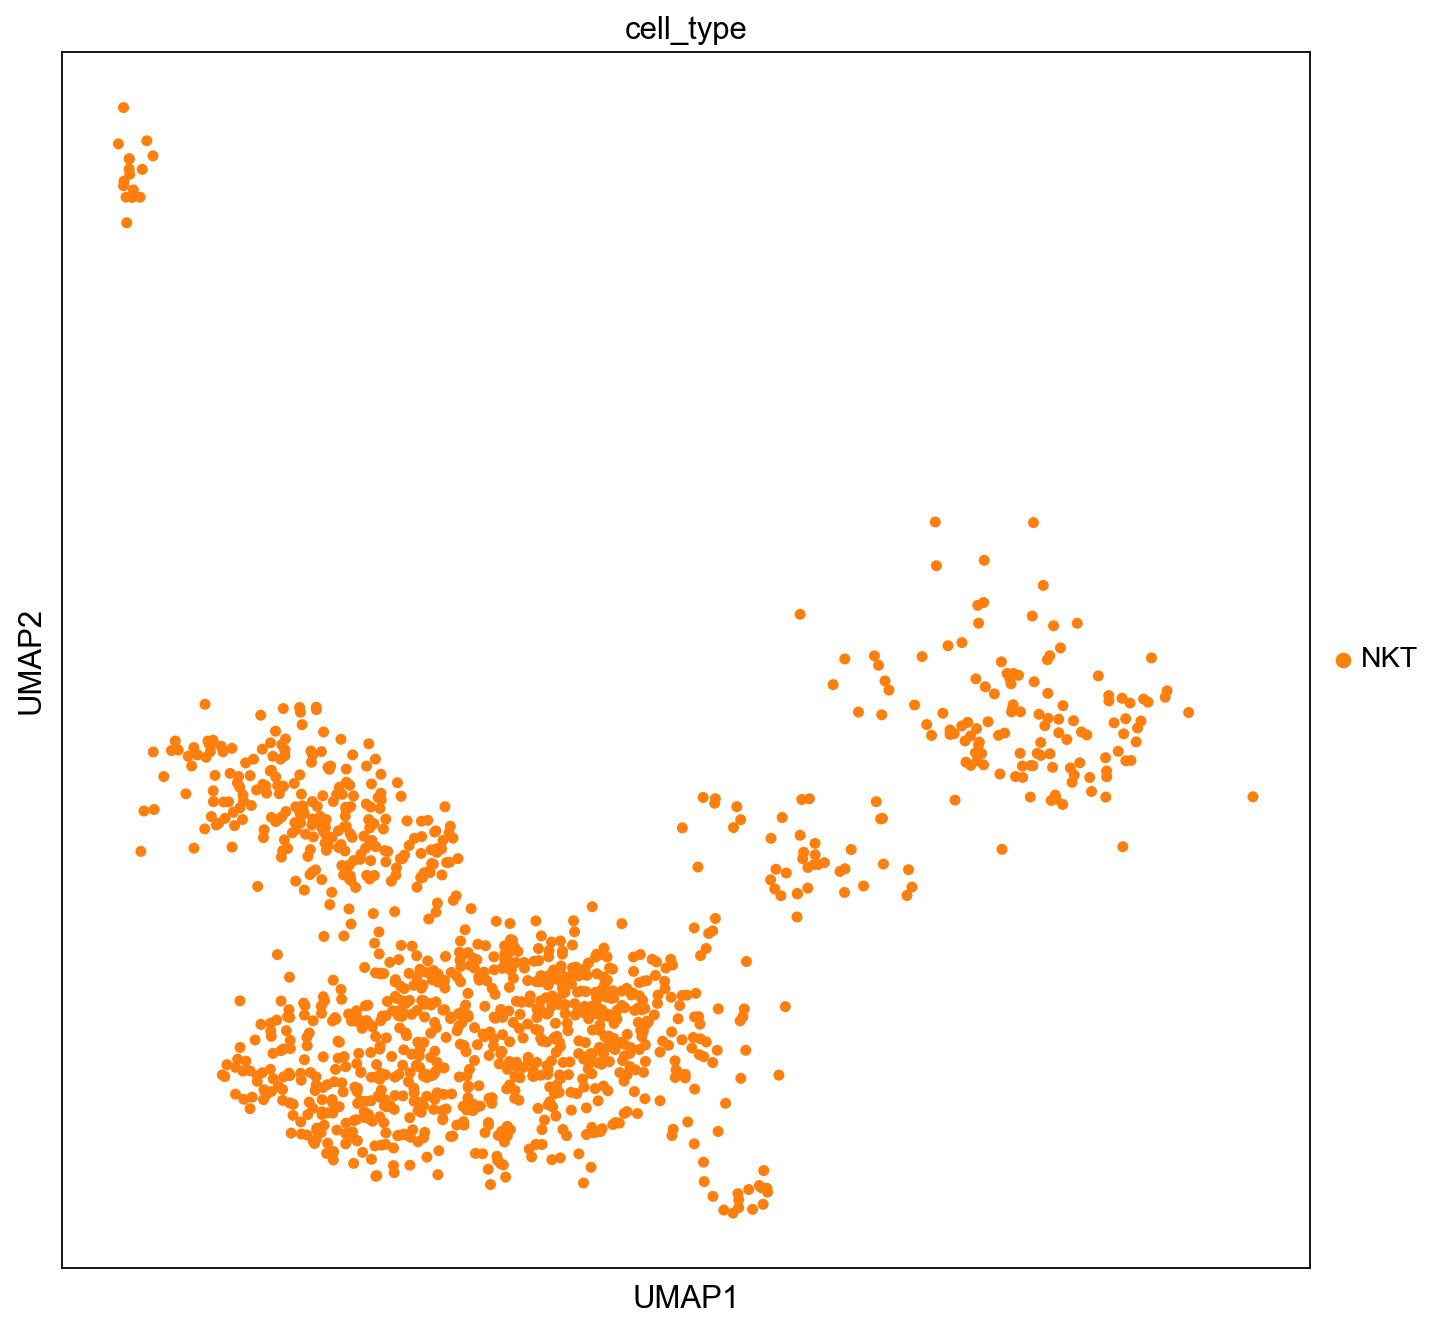

In [14]:
#Only selected sample, NKT cells

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(sample_nk, color = ['cell_type'], color_map = 'viridis')

In [15]:
#Computing a neighborhood of observations using latent space, object with only NKT

sc.pp.neighbors(sample_nk, use_rep="X_totalVI")   

sc.tl.umap(sample_nk)

In [16]:
#Computing a neighborhood of observations using latent space, object with all cell types

sc.pp.neighbors(eg, use_rep="X_totalVI")   

sc.tl.umap(eg)

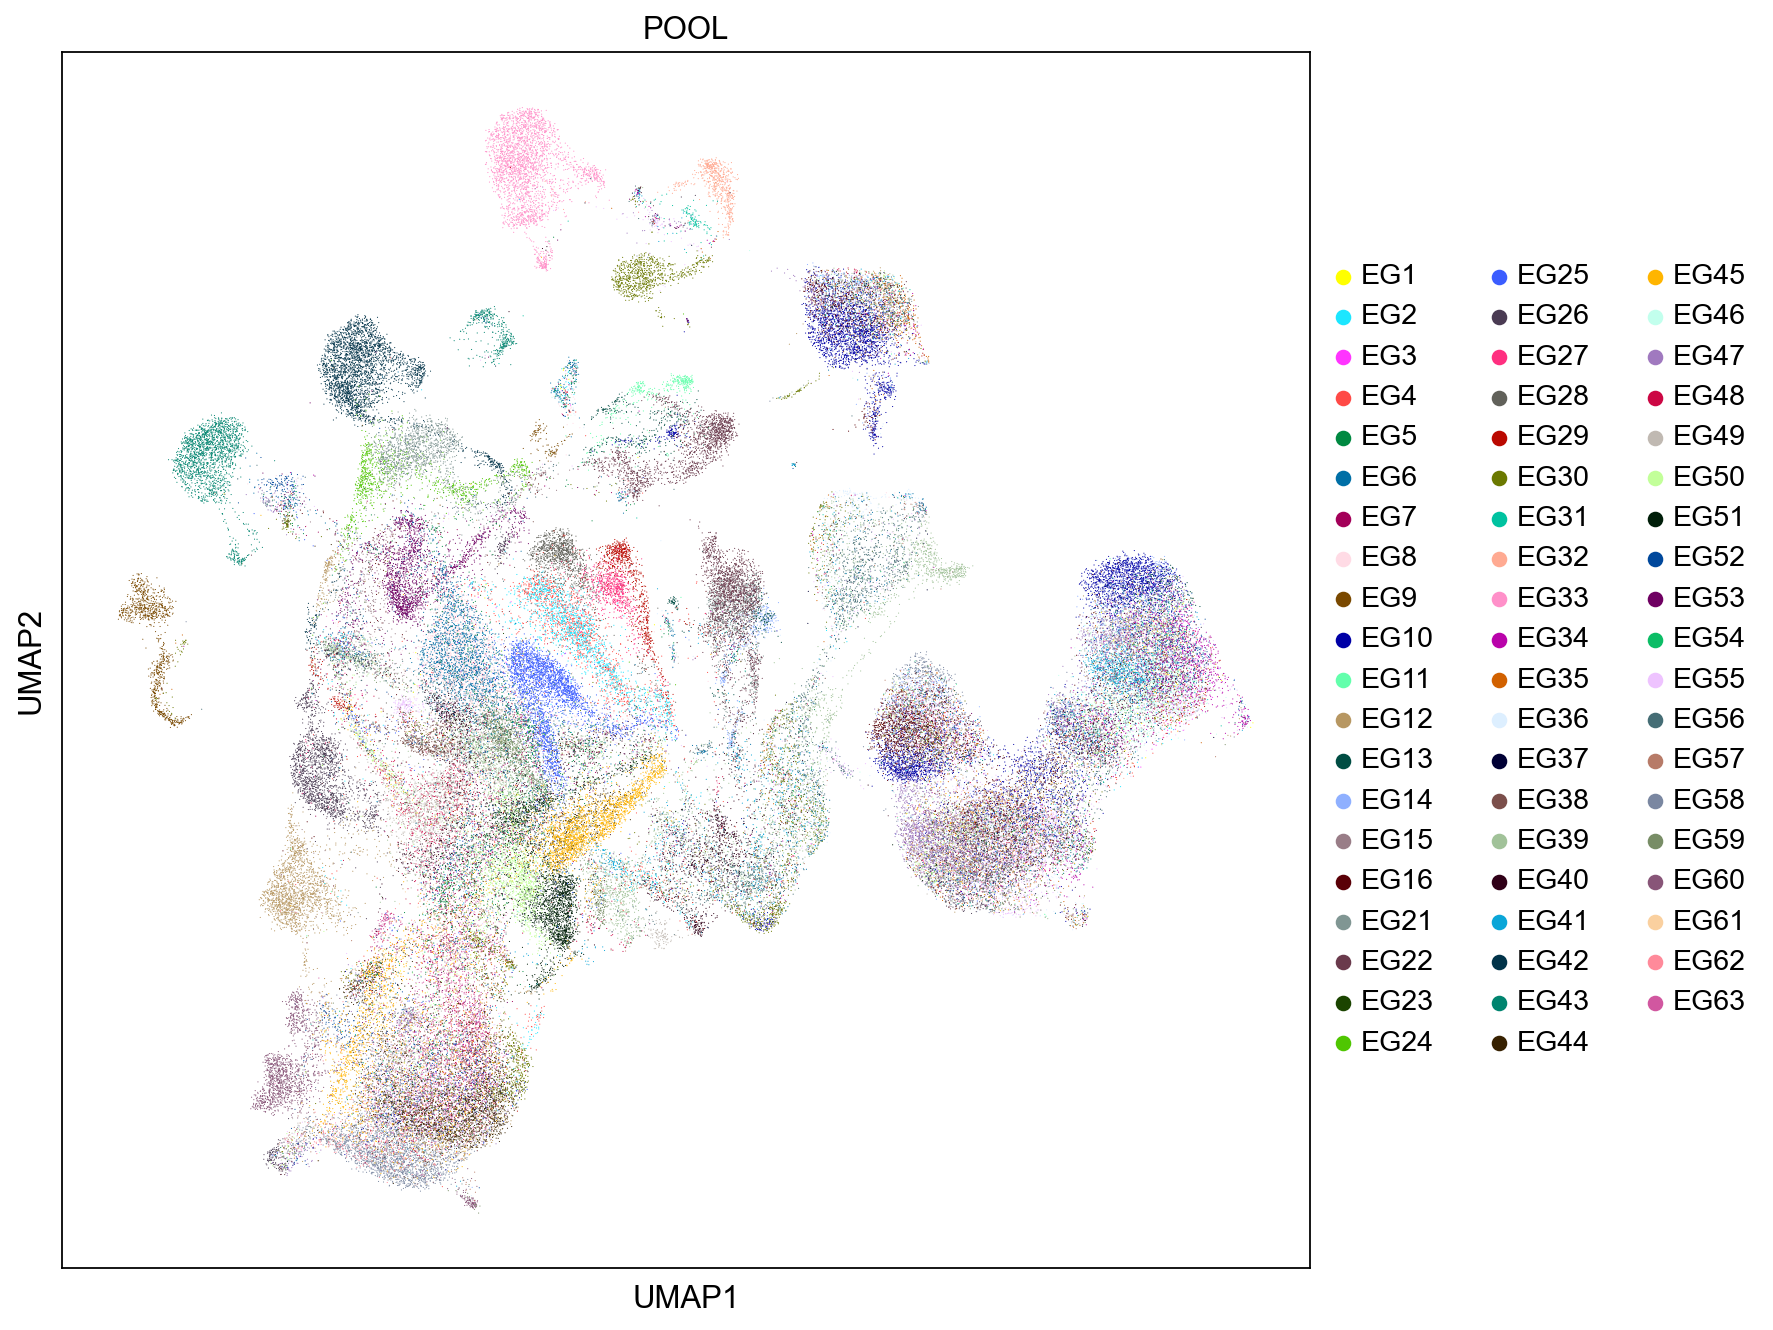

In [17]:
# all cell types from whole dataset, coloured by samples

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata, color = ['POOL'])

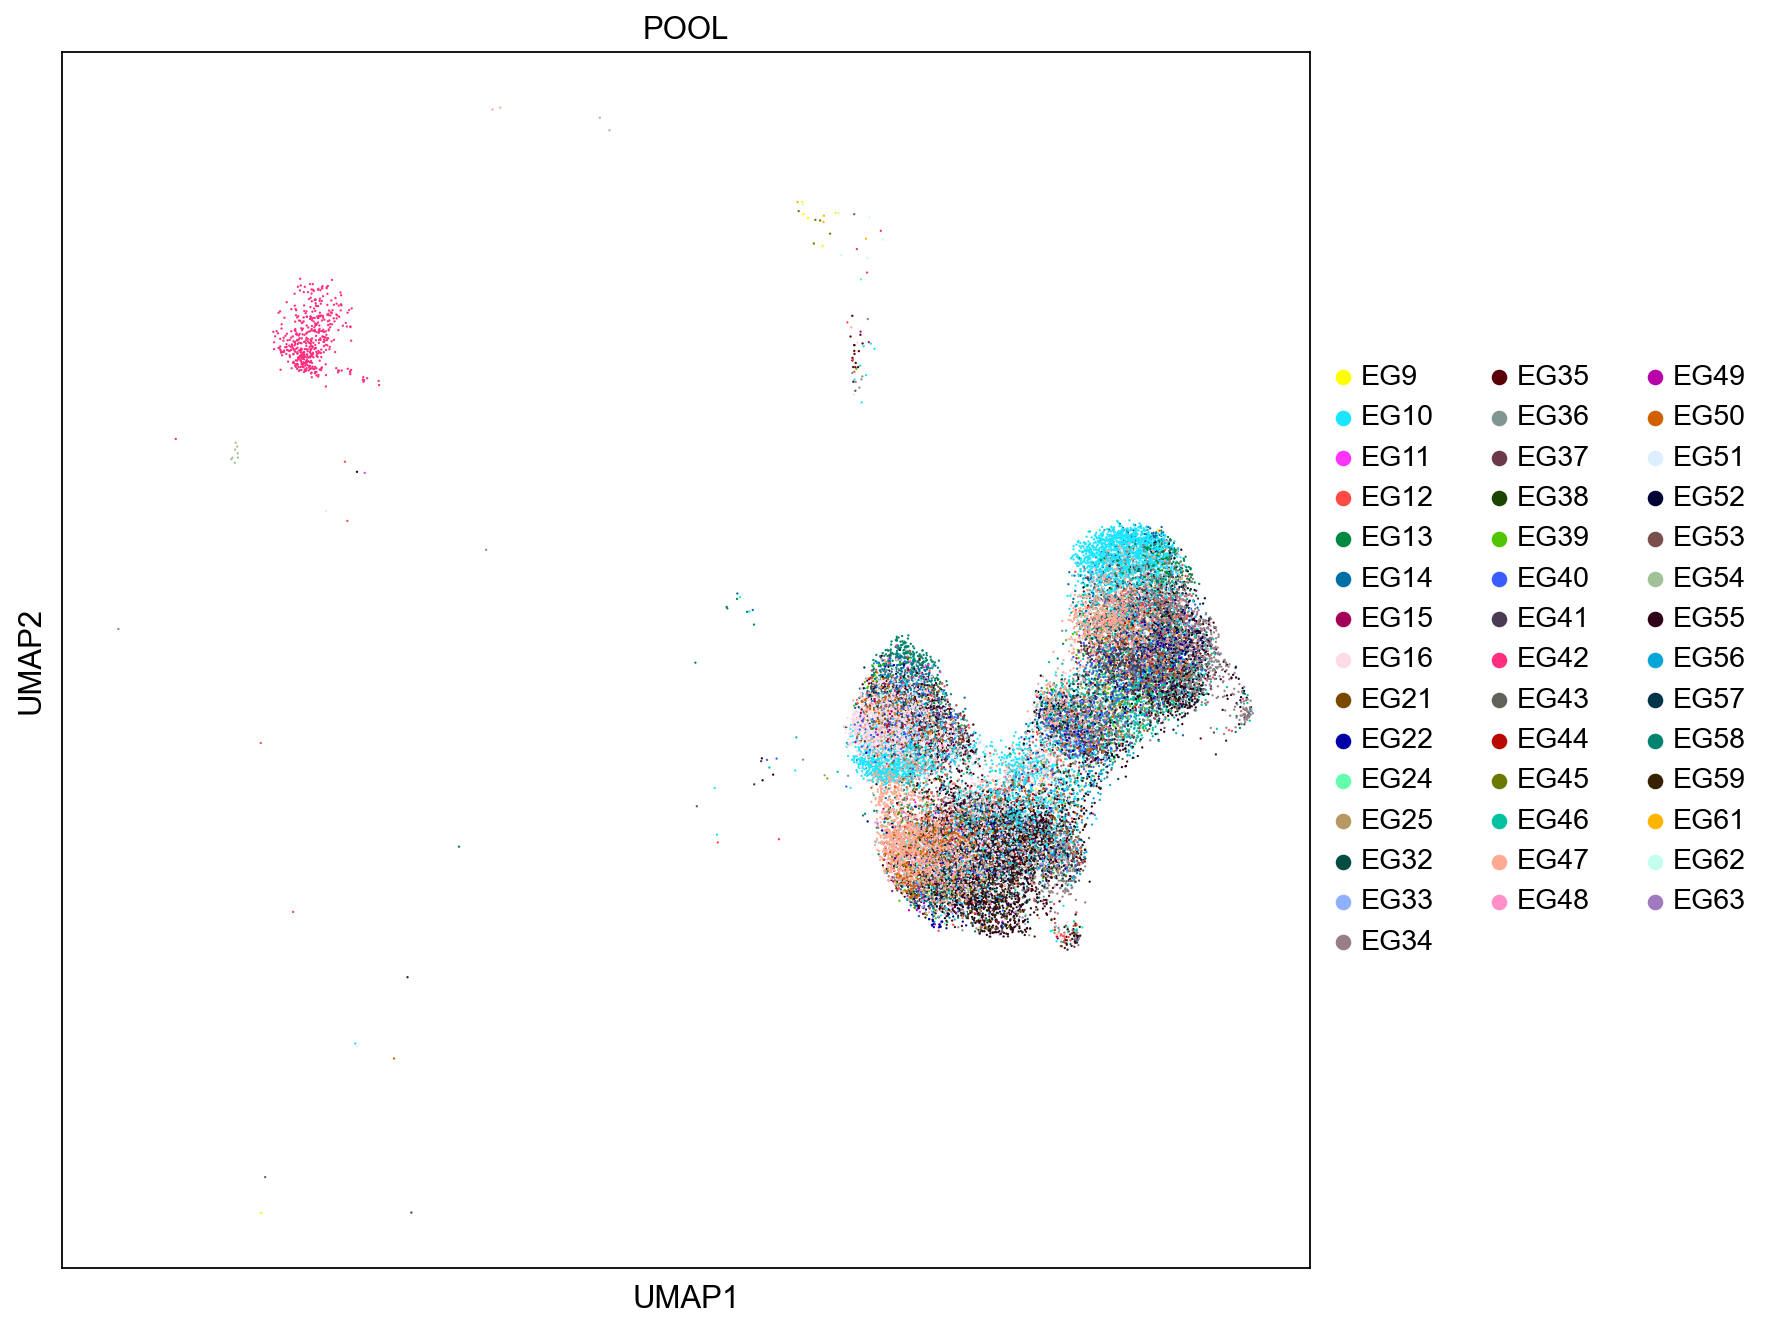

In [18]:
#NKT cells from whole dataset, coloured by samples

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata_nkt, color = ['POOL'])

# 1.  Markers by Yang et al. 

- sscRNA-seq on BM (n=6) and PB (n=2). In total, 5567 and 3046 NK cells from the BM and blood were analyzed. 

- Recently, the definition of the NK cell-restricted progenitor population has been redefined as Lin− CD34+CD38+CD123−CD45RA+CD7+CD10+CD127− cells as a consistent fraction of putative NK precursors in secondary lymphoid organs turn out to be ILCs or ILC progenitors

- NK cell maturation occurs mostly in secondary lymphoidal organs. The analyses of NK cells from secondary lymphoidal organs will give insights into early NK developmental stages. In this study they were not able to detect earlier development states of NK cells. 

- Markers to define NK lineage: CD94 (KLRD1), NKp80 (KLRF1), NKG7 and GNLY. NCAM1 (CD56) as well, but was not well represented in this study.

- Markers used to catch NK cells (also progenitors/ILCs): Lin−, CD7+ (not all cells yet CD56+).

- Within this Lin−, CD7+ population 90% are CD56bright NK cells.

- Remaining CD56dim/- cells: over 50% express KLRC1 (NKp80) and CD16 => mature NK cells, rest (CD7+, CD56dim/−, CD16−, NKp80−) probably ILCs, NK progenitors, immature NK cells or immature cells with multiple lineages potential.  

- maturation of  CD56dimCXCR4+ NK cells = NKG2A, CD62L, CD57


### 7 clusters from BM NK cells: #

1. CD56bright NK

2. Transitional NK (intermediate expression of signature genes of either CD56bright or CD56dimCD57+ NK cells)

3. Adaptive NK: High KLRC2 expression, only detected from BM, mostly composed of cells of one donor. Also cells from few other samples detected, not high KLRC2, but instead high CD52 expression.

4. Mature NK:  High expression of molecules important for cytotoxic function. Enrichment of gene sets, including the apical junction, regulation of actin cytoskeleton, NK cell-mediated cytotoxicity, and structure constituent of the cytoskeleton in the “Mature NK” cluster com- pared to the rest of the cells

5. Terminal NK: Mature NK and terminal NK clusters together form the CD57+ cell population. Similar transcriptional and functional profile as mature NKs, but increased expression of ZEB2,  CX3CR1 and HAVCR2 (TIM-3). Dampened signaling and metabolic profiles => quiescent state? 

6. Active NK : same features as inflamed NK. Several genes that belong to the immediate early genes (IEGs). IEGs are induced rapidly in response to stimuli without nascent protein synthesis. Active transcription, activation of several signaling pathways (KRAS-MAPK, TRAF6-NF-kappa-B. Active NK cluster is potentially within the CD56dim NK population (mature NKs) with a decreased expression of the genes encoding cytolytic proteins compared to the mature NK cluster. Maybe not unique developmental stage. 

7. Inflamed NK (mostly composed of cells of one patient, who donored BM) 


### Markers: #

- Is NK: KLRD1 (CD94), KLRF1, NKG7, GNLY, NCAM1 (CD56), CD7

- CD56bright: IL7RA (IL7R), SELL (CD62L), NKG2A (KLRC1), GZMK, CD44, XCL1, XCL2. Minimal expression of FCGR3A (CD16), B3GAT1 (CD57) and CD160. 

- Adaptive: KLRC2 (NKG2C), CD52, CD3E/D/G. Low expresison of FcεRγ (FCER1G), SYK (SYK), EAT-2 (SH2D1B), and PLZF (ZBTB16) compared to other clusters

- Mature NK: B3GAT1 (CD57), PRF1, GZMA, GZMB, GZMH, ACTB, ARPC2, CORO1A, CFL1, CST7, PFN1, ANXA1). 

- Terminal NK: 
 - bonemarrow: ZEB2, CX3CR1 and HAVCR2 (TIM-3), WDR74, SNORD3A, TMEM107, SNORD3D, RNU12, SNORD3B-2, SNORD3B-1, C12orf57, HIST1H1E, HIST1H1C, HIST1H1D, HIST2H2BE, RNU11, JUN, PTCH2, RP11-386I14.4,CD38. 
 - Peripheral blood: MYBL1, CX3CR1, RNU12, DDX17, HIST1H1C, TMEM107, SNORD3A, NKTR, WDR74, HIST2H2BE, HIST1H1E, HIST1H1D

- Active NK: NFKBIA, JUN, JUNB, ZFP36, DOS, FOSB, DUSP1, NR4A2, CXCR4

- Inflamed NK: IFIT3, IFIT2, TNF, CD69




## 1.1 NK lineage defining markers

In [19]:
is_nk_yang = ['KLRD1', 'KLRF1', 'NKG7', 'GNLY', 'NCAM1'] #the most DE genes in NK cells
is_nk_yang_prot = ['CD94','CD56', 'CD7_prot'] 


# NKp80 (KLRF1) not in the ab panel of Neurips
# KLRD1 = CD94, NCAM1 = CD56

In [20]:
#Used to check which markers were measured

#listOfmarkers= ['CD127']


#for x in listOfmarkers:
#    if x in adata_neurips.var_names:
#        print(x)


NameError: name 'adata_neurips' is not defined

In [ ]:
#Used to check which markers were measured

#listOfmarkers= ["CD127"]

#for x in listOfmarkers:
#    if x in prot.columns:
#        print(x)


In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Is NK cell, RNA")
sc.pl.umap(sample_nk, color = is_nk_yang, vmax="p99", color_map = 'viridis', ncols=2)

print("Is NK cell, protein (KLRD1 = CD94, NCAM1 = CD56)")

sc.pl.umap(sample_nk, color = is_nk_yang_prot, vmax="p99", color_map = 'viridis')

In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Is NK cell, RNA")
sc.pl.umap(eg, color = is_nk_yang, vmax="p99", color_map = 'viridis', ncols=2)

print("Is NK cell, protein (KLRD1 = CD94, NCAM1 = CD56)")

sc.pl.umap(eg, color = is_nk_yang_prot, vmax="p99", color_map = 'viridis')

## 1.1 Immature CD56bright NK cells

In [ ]:
#IL7R = CD126, was not included in the ab panel


cd56bright_rna= ['IL7R', 'SELL', 'KLRC1', 'GZMK', 'CD44', 'XCL1', 'XCL2']
cd56bright_prot = ['CD62L', 'CD44_prot']

cd56bright_rna_low = ['FCGR3A', 'B3GAT1']
cd56bright_prot_low = ['CD16', 'CD160', 'CD57']

#CD62L = SELL, CD16 = FCGR3A, CD57 = B3GAT1

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cells, RNA")
sc.pl.umap(sample_nk, color = cd56bright_rna, vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cells, protein")
sc.pl.umap(sample_nk, color = cd56bright_prot, vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cells, low expression, RNA")
sc.pl.umap(sample_nk, color = cd56bright_rna_low, vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cells, low expression, protein")
sc.pl.umap(sample_nk, color = cd56bright_prot_low, vmax="p99", color_map = 'viridis', ncols=2)



In [ ]:
sc.pl.umap(eg, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cells, RNA")
sc.pl.umap(eg, color = cd56bright_rna, vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cells, protein")
sc.pl.umap(eg, color = cd56bright_prot, vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cells, low expression, RNA")
sc.pl.umap(eg, color = cd56bright_rna_low, vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cells, low expression, protein")
sc.pl.umap(eg, color = cd56bright_prot_low, vmax="p99", color_map = 'viridis', ncols=2)



## 1.2 Transitional NK

Defined by down-regulation of the genes of CD56bright cluster and uppregulation of the genes of CD56dim cluster. 


## 1.3 Adaptive NK

In [ ]:
adaptive_high_rna = ['KLRC2', 'CD52', 'CD3E', 'CD3D', 'CD3G', 'IL32' ]
adaptive_low_rna = ['FCER1G', 'SYK', 'SH2D1B', 'ZBTB16']
adaptive_high_prot = ['CD52_prot']

#KLRC2 = CD195c, not used in the ab panel of Neurips

sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Adaptive NK cells, highly expressed, RNA")
sc.pl.umap(sample_nk, color = adaptive_high_rna, vmax="p99", color_map = 'viridis', ncols=2)

print("Adaptive NK cells, highly expressed, protein")
sc.pl.umap(sample_nk, color = adaptive_high_prot, vmax="p99", color_map = 'viridis', ncols=2)

print("Adaptive NK cells, lower expression, RNA")
sc.pl.umap(sample_nk, color = adaptive_low_rna, vmax="p99", color_map = 'viridis', ncols=2)

In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Adaptive NK cells, highly expressed, RNA")
sc.pl.umap(eg, color = adaptive_high_rna, vmax="p99", color_map = 'viridis', ncols=2)

print("Adaptive NK cells, highly expressed, protein")
sc.pl.umap(eg, color = adaptive_high_prot, vmax="p99", color_map = 'viridis', ncols=2)

print("Adaptive NK cells, lower expression, RNA")
sc.pl.umap(eg, color = adaptive_low_rna, vmax="p99", color_map = 'viridis', ncols=2)

## 1.4 Mature NK

In [ ]:
mature_rna= ['B3GAT1', 'PRF1', 'GZMA', 'GZMB', 'GZMH', 'ACTB', 'ARPC2', 'CORO1A', 'CFL1', 'CST7', 'PFN1', 'ANXA1']

mature_prot = ['CD57']

sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Mature NK cells, RNA")
sc.pl.umap(sample_nk, color = mature_rna, vmax="p99", color_map = 'viridis', ncols=2)

print("Mature NK cells, protein")
sc.pl.umap(sample_nk, color = mature_prot, vmax="p99", color_map = 'viridis', ncols=2)



In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Mature NK cells, RNA")
sc.pl.umap(eg, color = mature_rna, vmax="p99", color_map = 'viridis', ncols=2)

print("Mature NK cells, protein")
sc.pl.umap(eg, color = mature_prot, vmax="p99", color_map = 'viridis', ncols=2)




## 1.5 Terminal NK cells 

In [ ]:
terminal_rna_bm = ['ZEB2',  'CX3CR1','HAVCR2','WDR74', 'SNORD3A', 'TMEM107', 'SNORD3D', 'RNU12', 'SNORD3B-2', 'SNORD3B-1', 'C12orf57', 'HIST1H1E', 'HIST1H1C', 'HIST1H1D', 'HIST2H2BE', 'RNU11', 'JUN', 'PTCH2', 'RP11-386I14.4','CD38']
terminal_prot_bm = ['CD38_prot']
terminal_rna_pb =  ['MYBL1', 'CX3CR1', 'RNU12', 'DDX17', 'HIST1H1C', 'TMEM107', 'SNORD3A', 'NKTR', 'WDR74', 'HIST2H2BE', 'HIST1H1E', 'HIST1H1D']

# 'NEAT' not found in dataser

sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Terminal NK cells, RNA")
sc.pl.umap(sample_nk, color = terminal_rna_bm, vmax="p99", color_map = 'viridis', ncols=2)


print("Terminal NK cells, protein")
sc.pl.umap(sample_nk, color = terminal_rna_bm, vmax="p99", color_map = 'viridis', ncols=2)


print("Terminal NK cells (blood), RNA")
sc.pl.umap(sample_nk, color = terminal_rna_pb, vmax="p99", color_map = 'viridis', ncols=2)




In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Terminal NK cells, RNA")
sc.pl.umap(eg, color = terminal_rna_bm, vmax="p99", color_map = 'viridis', ncols=2)


print("Terminal NK cells, protein")
sc.pl.umap(eg, color = terminal_rna_bm, vmax="p99", color_map = 'viridis', ncols=2)


print("Terminal NK cells (blood), RNA")
sc.pl.umap(eg, color = terminal_rna_pb, vmax="p99", color_map = 'viridis', ncols=2)



## 1.6 Inflamed NK cells

According to the paper, this  cluster was mostly composed of cells of one patient, who donored BM. 

In [ ]:
sc.set_figure_params(figsize=(7, 7))

inflamed_nk = ['IFIT3', 'IFIT2', 'TNF', 'CD69']
inflamed_nk_prot = ['CD69_prot']

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Inflamed NK cells, RNA")
sc.pl.umap(sample_nk, color = inflamed_nk, vmax="p99", color_map = 'viridis', ncols=2)

print("Inflamed NK cells, protein")
sc.pl.umap(sample_nk, color = inflamed_nk_prot, vmax="p99", color_map = 'viridis', ncols=2)




In [ ]:
sc.set_figure_params(figsize=(7, 7))

inflamed_nk = ['IFIT3', 'IFIT2', 'TNF', 'CD69']
inflamed_nk_prot = ['CD69_prot']

sc.pl.umap(eg, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Inflamed NK cells, RNA")
sc.pl.umap(eg, color = inflamed_nk, vmax="p99", color_map = 'viridis', ncols=2)

print("Inflamed NK cells, protein")
sc.pl.umap(eg, color = inflamed_nk_prot, vmax="p99", color_map = 'viridis', ncols=2)




## 1.7. Active NK cells

In [ ]:
#In this population CXCR4 expression is high, but expression is reduced when NK cells become functionally mature
# CXCR4 = CD184, ab not used in Neurips dataset

active_nk= ['NFKBIA', 'JUN', 'JUNB', 'ZFP36', 'FOS', 'FOSB', 'DUSP1', 'NR4A2', 'CD69','CXCR4']
active_nk_prot = ["CD69_prot"]

sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Active NK cells, RNA")
sc.pl.umap(sample_nk, color = active_nk, vmax="p99", color_map = 'viridis', ncols=2)

print("Active NK cells, protein")
sc.pl.umap(sample_nk, color = active_nk_prot, vmax="p99", color_map = 'viridis', ncols=2)




In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Active NK cells, RNA")
sc.pl.umap(eg, color = active_nk, vmax="p99", color_map = 'viridis', ncols=2)


print("Active NK cells, protein")
sc.pl.umap(eg, color = active_nk_prot, vmax="p99", color_map = 'viridis', ncols=2)


